In [2]:
using PyPlot

[0.

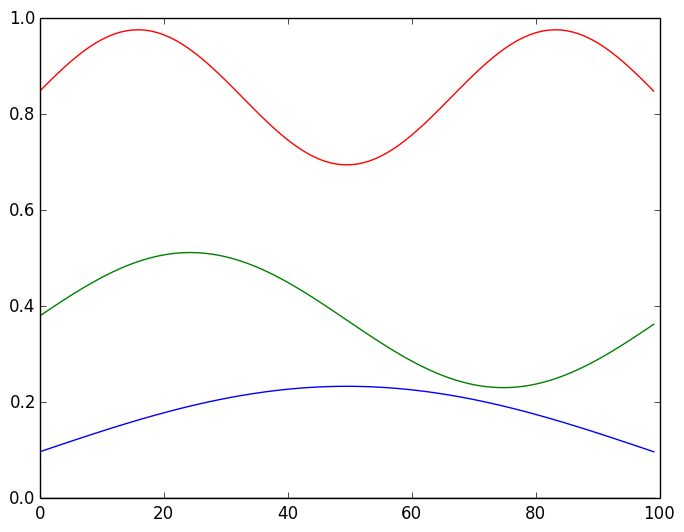

09291249735500746,0.37156010257918953,0.8356732421109427,1.484802916461831,2.3183211345955215,3.335421521467538,4.535120098142329,5.916256233728177,7.47749376821298,9.217322305113157]


In [3]:
# Following: http://www.cond-mat.de/teaching/DFT/qm1d.html
# 1D numeric Shrodinger equation solver, by discretisation to an Eigenvalue problem
#  $f''(x_i) \approx (f(x_{i-1})-2*f(x_i)+f(x_{i+1}))/dx^2$

N=99

#V(r)=-3/abs(r) #- q^2/()   #... ish
#V(r)=1E-3*r^2  # Harmonic well
V(r)=0 # infinite well pot.
#V(r)= 0.01*r^2+0.1*r  # an-Harmonic well
plot([V(r) for r in -N/2:N/2],color="black") # Potential energy curve

dx=10/(N-1)

# PE terms on the trace
diagonal = [(2.0/dx^2 + V(r))::Float64 for r in -N/2:N/2]
# KE terms on the tridiagonals
updiagonal = [(-1/dx^2)::Float64 for r in 1:N]

H =diagm(diagonal,0) + diagm(updiagonal,1) + diagm(updiagonal,-1)
evals,evec=eig(H)

# This many energy levels
n=3

for i in 1:3
    # Ψ ; the wavefunction, offset by the eigenvalue
    plot(evec[:,i]+evals[i])
end
    

println(evals[1:10])

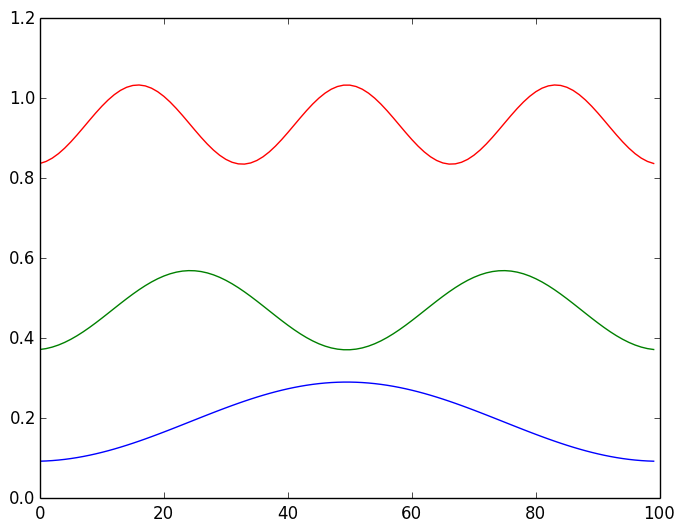

In [4]:
for i in 1:3
    # |Ψ|^2 ; the Probability Density of finding an electron
    plot(10.0*evec[:,i].^2+evals[i])
end


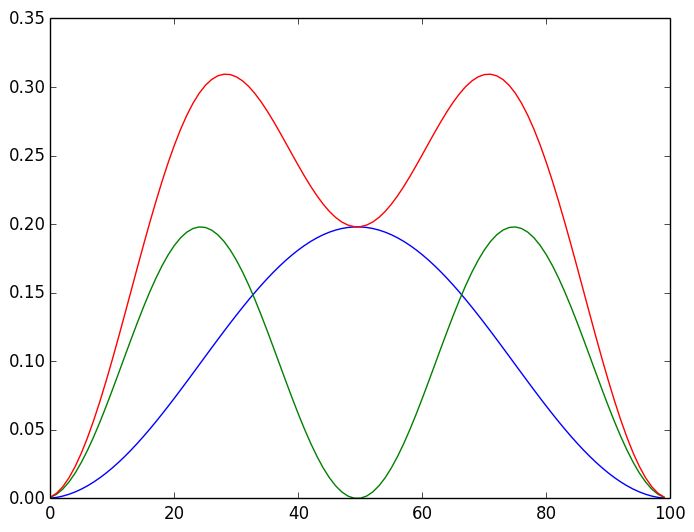

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x323108ed0>

In [5]:
plot(10.0*evec[:,1].^2)
plot(10.0*evec[:,2].^2)

# First two |Ψ|^2 summed
plot(10.0*evec[:,1].^2+10.0*evec[:,2].^2)